# <font color='Orange'><b>Mean-shift Clustering </b></font>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs, make_classification
from itertools import cycle
from sklearn.cluster import MeanShift, estimate_bandwidth
from skimage.io import imread

img_dir = './img/'


# Plotting clusters
def plot_cluster(X, n_clusters_, labels, cluster_centers):

    plt.figure(1)
    plt.clf()
    plt.figure(figsize=(8,8))

    colors = cycle('bgrymckbgrymckbgrymckbgrymck')

    for k, col in zip(range(n_clusters_), colors):
        my_members = labels == k
        cluster_center = cluster_centers[k]
        plt.plot(X[my_members, 0], X[my_members, 1], col + '.', markersize=12)

        if len(cluster_center)==2:
            plt.plot(cluster_center[0], cluster_center[1], 'X', markerfacecolor='k', markeredgecolor='none', markersize=12)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

# <font color='orange'><b> Clustering using sklearn library</b></font>


### Plain data

In [4]:
centers = [[1, 1], [-1, -1], [1, -1], [-2,2], [3,3]]
X, _ = make_blobs(n_samples=1000, centers=centers, cluster_std=0.6)
# X array di posizioni (x,y) dei punti generati

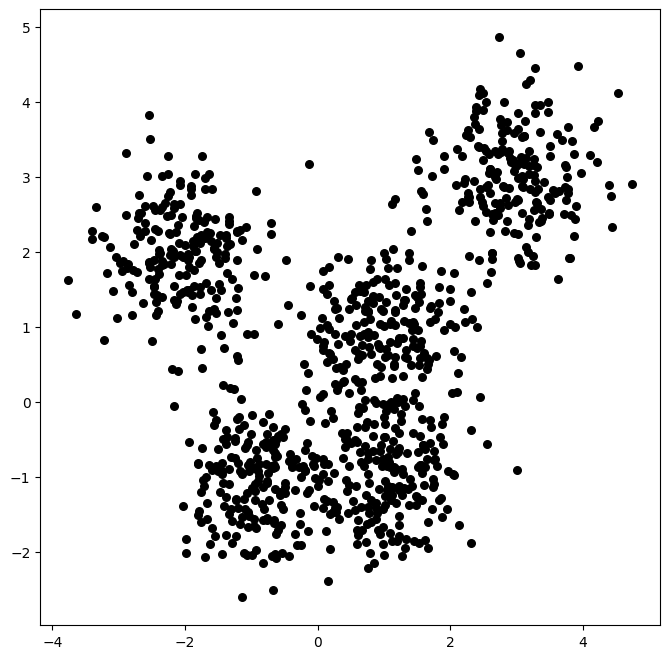

In [5]:
# Plot data
plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], marker='o', c='k', s=30)

<Figure size 640x480 with 0 Axes>

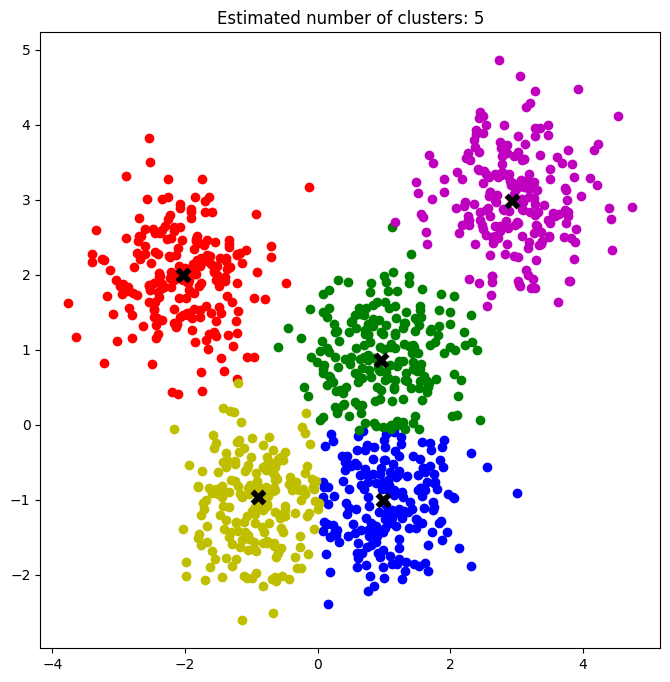

In [6]:
bandwidth = estimate_bandwidth(X, quantile=0.1)

ms = MeanShift(bandwidth = bandwidth, bin_seeding=True)
ms.fit(X)
labels_MS = ms.labels_
cluster_centers_MS = ms.cluster_centers_

labels_unique_MS = np.unique(labels_MS)
n_clusters_MS= len(labels_unique_MS)

plot_cluster(X, n_clusters_MS, labels_MS, cluster_centers_MS)

### Data with features

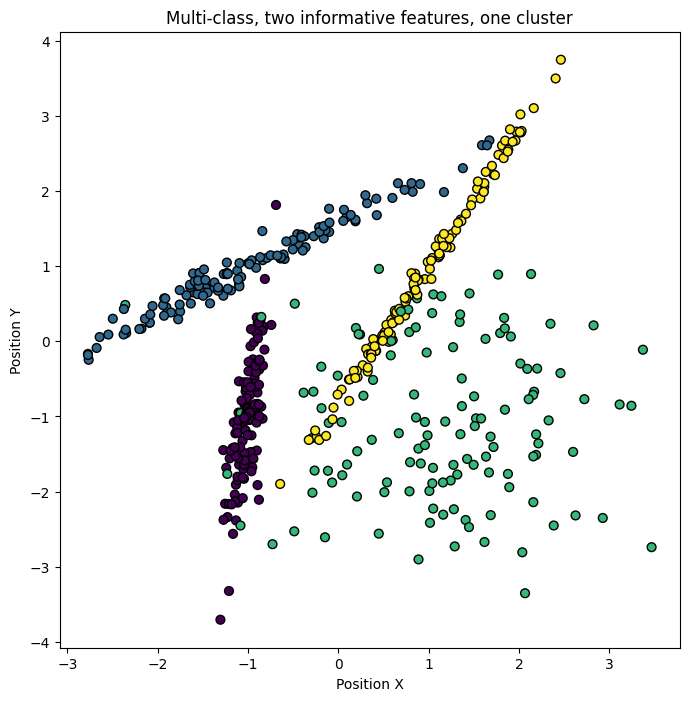

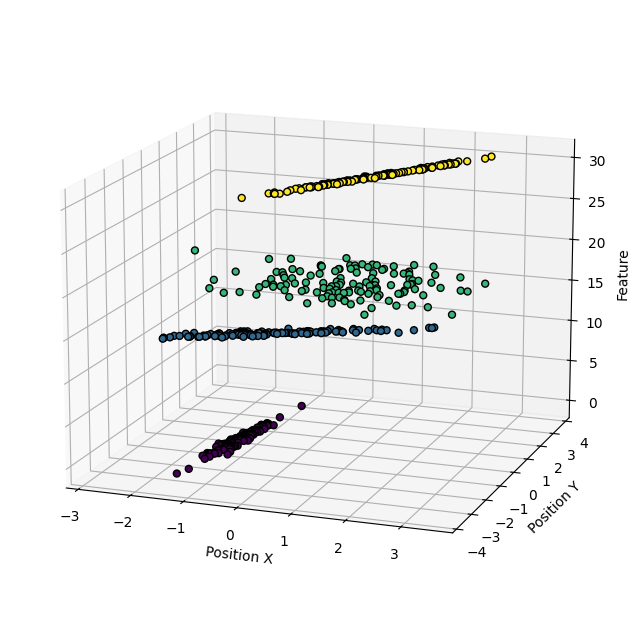

In [7]:
X1, Y1 = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=4)
# X1 array di posizioni nella forma (x,y)
# Y1 array di feature nella forma (a,b,...) [nel caso delle immagini in formato rgb sarà (r,g,b)]


Y1 = Y1*10     # per rendere le feature più significative

plt.figure(figsize=(8,8))
plt.title("Multi-class, two informative features, one cluster")
plt.scatter(X1[:,0], X1[:,1], marker="o", c=Y1, s=40, edgecolor="k")
plt.xlabel('Position X')
plt.ylabel('Position Y')

plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(X1[:,0], X1[:,1], Y1, marker="o", c=Y1, s=25, edgecolor="k", depthshade=False)
ax.set_xlabel('Position X')
ax.set_ylabel('Position Y')
ax.set_zlabel('Feature')
ax.view_init(15,-70)

[0 1 2 3]
number of estimated clusters : 4


<Figure size 640x480 with 0 Axes>

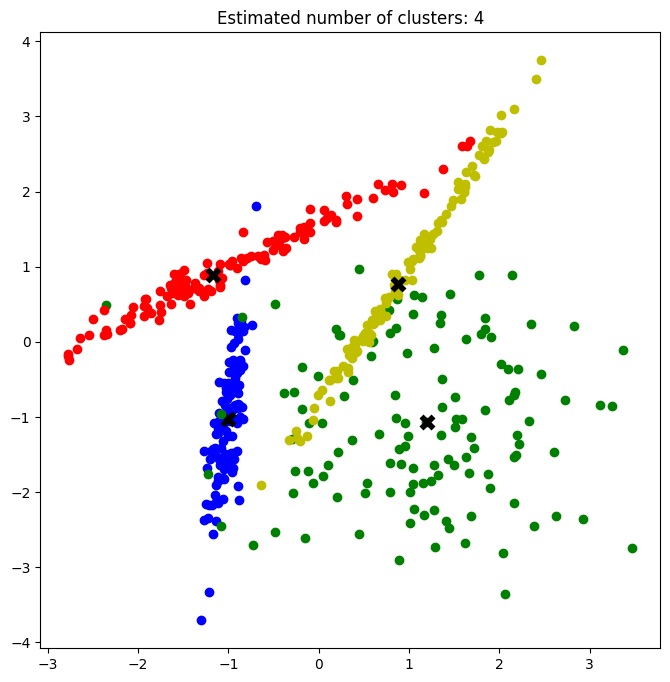

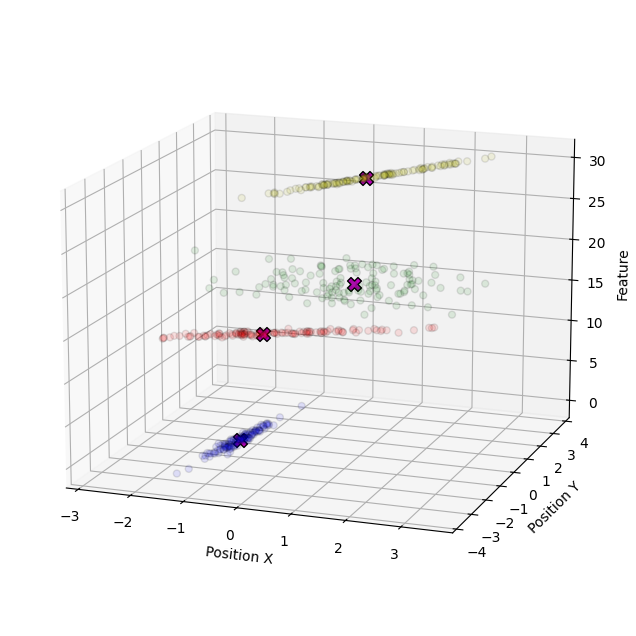

In [25]:
XY1 = np.column_stack((X1, Y1))
bandwidth = estimate_bandwidth(XY1, quantile=0.2)

ms = MeanShift(bandwidth = bandwidth, bin_seeding=True)


# Y1 = np.reshape(Y1, (-1,1))
ms.fit(XY1)
labels_MS = ms.labels_
cluster_centers_MS = ms.cluster_centers_

labels_unique_MS = np.unique(labels_MS)
n_clusters_MS= len(labels_unique_MS)

print(labels_unique_MS)

print("number of estimated clusters : %d" % n_clusters_MS)

plot_cluster(X1, n_clusters_MS, labels_MS, cluster_centers_MS[:,:2])



cols = list('bgrymckbgrymckbgrymckbgrymck')
colorMap = dict(zip(np.unique(labels_MS),cols))

colors = []
for y in labels_MS:
    colors.append(colorMap[y])


plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(X1[:,0], X1[:,1], Y1, marker="o", c=colors, s=25, edgecolor="k", depthshade=False, alpha=0.1)
ax.scatter3D(cluster_centers_MS[:,0],cluster_centers_MS[:,1],cluster_centers_MS[:,2], marker='X', c='m', s=100, edgecolor='k', depthshade=False)
ax.set_xlabel('Position X')
ax.set_ylabel('Position Y')
ax.set_zlabel('Feature')
ax.view_init(15,-70)


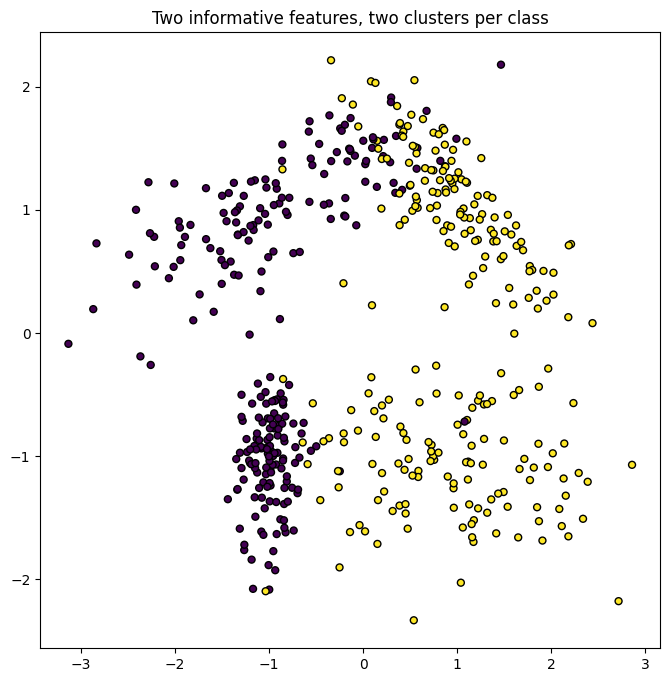

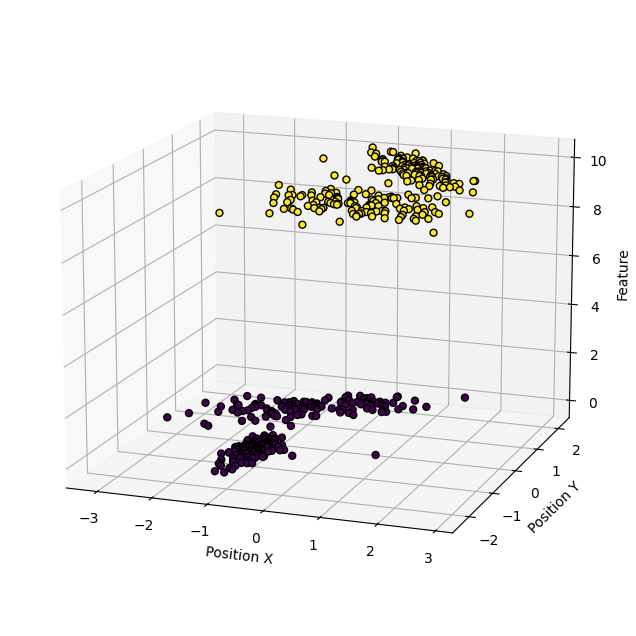

In [59]:
X2, Y2 = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=2)
Y2 = Y2*10

plt.figure(figsize=(8,8))

plt.title("Two informative features, two clusters per class")
plt.scatter(X2[:,0], X2[:,1], marker="o", c=Y2, s=25, edgecolor="k")


plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(X2[:,0], X2[:,1], Y2, marker="o", c=Y2, s=25, edgecolor="k", depthshade=False)
ax.set_xlabel('Position X')
ax.set_ylabel('Position Y')
ax.set_zlabel('Feature')
ax.view_init(15,-70)

<Figure size 640x480 with 0 Axes>

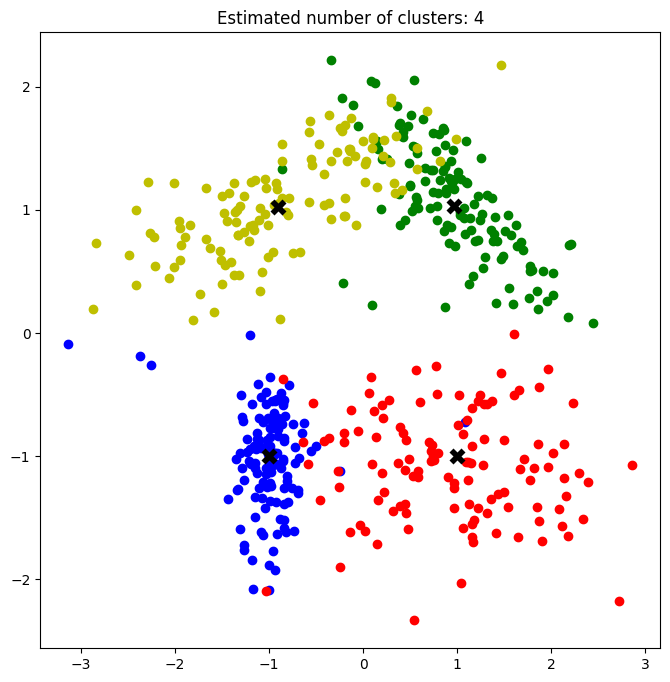

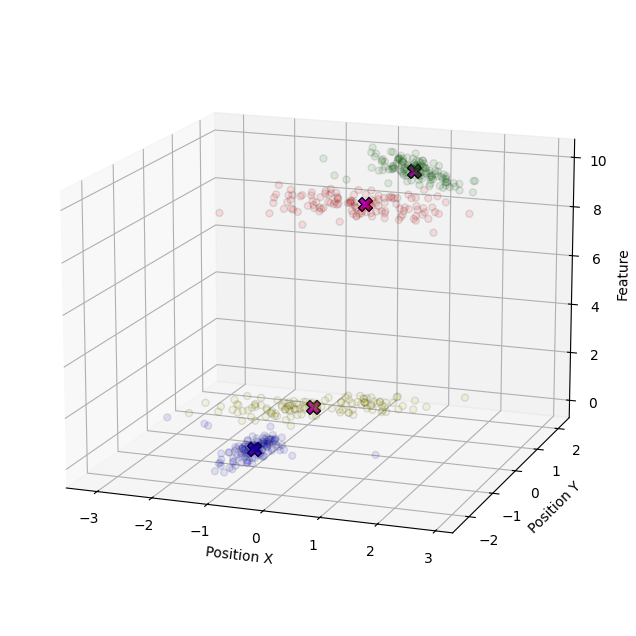

In [69]:
XY2 = np.column_stack((X2, Y2))     # ogni punto ora è p(x,y, f1,f2,...,fn)

bandwidth = estimate_bandwidth(XY2, quantile=0.22)

ms = MeanShift(bandwidth = bandwidth, bin_seeding=True)


ms.fit(XY2) # tiene conto di posizione e feature
labels_MS = ms.labels_
cluster_centers_MS = ms.cluster_centers_

labels_unique_MS = np.unique(labels_MS)

n_clusters_MS= len(labels_unique_MS)

plot_cluster(X2, n_clusters_MS, labels_MS, cluster_centers_MS[:,:2])


cols = list('bgrymckbgrymckbgrymckbgrymck')
colorMap = dict(zip(np.unique(labels_MS),cols))

colors = []
for y in labels_MS:
    colors.append(colorMap[y])


plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(X2[:,0], X2[:,1], Y2, marker="o", c=colors, s=25, edgecolor="k",  depthshade=False, alpha=0.1)
ax.scatter3D(cluster_centers_MS[:,0],cluster_centers_MS[:,1],cluster_centers_MS[:,2], marker='X', c='m', s=100, edgecolor='k', depthshade=False)
ax.set_xlabel('Position X')
ax.set_ylabel('Position Y')
ax.set_zlabel('Feature')
ax.view_init(15,-70)


## <font color='orange'><b> Mean-shift on Images</b></font> 

(-0.5, 240.5, 165.5, -0.5)

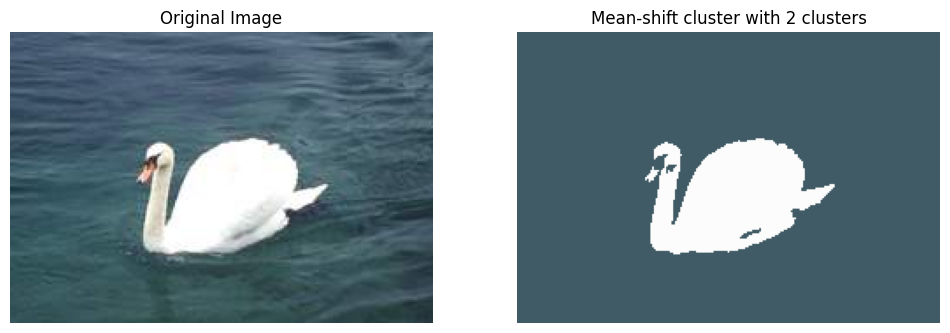

In [70]:
img = imread(img_dir + 'cigno.jpg') # cigno # bebe # balls 0.15 # peppers
w,h,c = img.shape

# in alcuni casi conviene effettuare pre-processing
# sigmaVal = 3
# winSize = np.uint8(np.round(sigmaVal*3))+1
# if winSize % 2 == 0: 	winSize = winSize +1
# img = cv2.GaussianBlur(img, (winSize,winSize), sigmaVal)

image_array = np.float32(img.reshape((-1,3)))

bandwidth = estimate_bandwidth(image_array, quantile=0.23,  n_samples=10000)

ms = MeanShift(bandwidth = bandwidth,  bin_seeding=True)
ms.fit(image_array)

labels = ms.labels_
cluster_centers = ms.cluster_centers_.astype(np.uint8)

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

res = cluster_centers[labels].reshape(w,h,c)

plt.figure(figsize=(12,5))

plt.subplot(121)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(res)
plt.title(f'Mean-shift cluster with {n_clusters_} clusters')
plt.axis('off')